# Determining Maternal Average Births, Mothers' Age & Birth Weight Across Counties in 2018 

In [77]:
# from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib notebook

# Data Ingestion

In [78]:
# ingest Data for analysis
dataset = pd.read_csv('data.csv')


,"Table name: county_natality Last updated: Nov 14, 2022 7:31 PM",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Year,County_of_Residence,County_of_Residence_FIPS,Births,Ave_Age_of_Mother,Ave_OE_Gestational_Age_Wks,Ave_LMP_Gestational_Age_Wks,Ave_Birth_Weight_gms,Ave_Pre_pregnancy_BMI,Ave_Number_of_Prenatal_Wks
1,1/1/2018,"Calhoun County, AL",01015,1265,26.67,38.11,38.25,3168.14,28.85,10.45
2,1/1/2018,"Tulsa County, OK",40143,8933,28.13,38.18,38.25,3243.39,27.58,11.04
3,1/1/2018,"Carroll County, GA",13045,1540,27.2,38.5,38.5,3253.35,27.98,10.75
4,1/1/2018,"Saginaw County, MI",26145,2182,27.41,38.75,38.5,3226.9,28.85,11.58
...,...,...,...,...,...,...,...,...,...,...
496,1/1/2018,"Butler County, OH",39017,4472,28.6,38.35,38.52,3276.42,27.54,11.8
497,1/1/2018,"District of Columbia, DC",11001,9212,30.85,38.51,38.52,3205.47,25.88,10.28
498,1/1/2018,"Unidentified Counties, MD",24999,5451,28.55,38.56,38.77,3307.82,27.72,11.67
499,1/1/2018,"Mesa County, CO",08077,1655,27.89,38.55,38.77,3194.48,26.89,10.81


In [83]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 10 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   Table name: county_natality Last updated: Nov 14, 2022 7:31 PM  501 non-null    object
 1   Unnamed: 1                                                      501 non-null    object
 2   Unnamed: 2                                                      501 non-null    object
 3   Unnamed: 3                                                      501 non-null    object
 4   Unnamed: 4                                                      501 non-null    object
 5   Unnamed: 5                                                      501 non-null    object
 6   Unnamed: 6                                                      501 non-null    object
 7   Unnamed: 7                                                    

# Data Cleaning and Transformation.

In [84]:
dataframe = pd.DataFrame(dataset)

In [80]:
dataframe = dataframe.rename(columns=dataframe.iloc[0]).drop(dataframe.index[0])

In [81]:
dataframe.drop(["Year", "County_of_Residence_FIPS" ], axis = 1, inplace = True)

In [82]:
dataframe

,County_of_Residence,Births,Ave_Age_of_Mother,Ave_OE_Gestational_Age_Wks,Ave_LMP_Gestational_Age_Wks,Ave_Birth_Weight_gms,Ave_Pre_pregnancy_BMI,Ave_Number_of_Prenatal_Wks
1,"Calhoun County, AL",1265,26.67,38.11,38.25,3168.14,28.85,10.45
2,"Tulsa County, OK",8933,28.13,38.18,38.25,3243.39,27.58,11.04
3,"Carroll County, GA",1540,27.2,38.5,38.5,3253.35,27.98,10.75
4,"Saginaw County, MI",2182,27.41,38.75,38.5,3226.9,28.85,11.58
5,"Hillsborough County, FL",17126,28.97,38.41,38.5,3230.36,26.75,10.64
...,...,...,...,...,...,...,...,...
496,"Butler County, OH",4472,28.6,38.35,38.52,3276.42,27.54,11.8
497,"District of Columbia, DC",9212,30.85,38.51,38.52,3205.47,25.88,10.28
498,"Unidentified Counties, MD",5451,28.55,38.56,38.77,3307.82,27.72,11.67
499,"Mesa County, CO",1655,27.89,38.55,38.77,3194.48,26.89,10.81


,County_of_Residence,Births,Ave_Age_of_Mother,Ave_OE_Gestational_Age_Wks,Ave_LMP_Gestational_Age_Wks,Ave_Birth_Weight_gms,Ave_Pre_pregnancy_BMI,Ave_Number_of_Prenatal_Wks
1,"Calhoun County, AL",1265,26.67,38.11,38.25,3168.14,28.85,10.45
2,"Tulsa County, OK",8933,28.13,38.18,38.25,3243.39,27.58,11.04
3,"Carroll County, GA",1540,27.2,38.5,38.5,3253.35,27.98,10.75
4,"Saginaw County, MI",2182,27.41,38.75,38.5,3226.9,28.85,11.58
5,"Hillsborough County, FL",17126,28.97,38.41,38.5,3230.36,26.75,10.64
...,...,...,...,...,...,...,...,...
496,"Butler County, OH",4472,28.6,38.35,38.52,3276.42,27.54,11.8
497,"District of Columbia, DC",9212,30.85,38.51,38.52,3205.47,25.88,10.28
498,"Unidentified Counties, MD",5451,28.55,38.56,38.77,3307.82,27.72,11.67
499,"Mesa County, CO",1655,27.89,38.55,38.77,3194.48,26.89,10.81


In [76]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 1 to 500
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   County_of_Residence          500 non-null    object
 1   Births                       500 non-null    object
 2   Ave_Age_of_Mother            500 non-null    object
 3   Ave_OE_Gestational_Age_Wks   500 non-null    object
 4   Ave_LMP_Gestational_Age_Wks  500 non-null    object
 5   Ave_Birth_Weight_gms         500 non-null    object
 6   Ave_Pre_pregnancy_BMI        500 non-null    object
 7   Ave_Number_of_Prenatal_Wks   500 non-null    object
dtypes: object(8)
memory usage: 31.4+ KB


In [68]:
dataframe.describe()

,County_of_Residence,Births,Ave_Age_of_Mother,Ave_OE_Gestational_Age_Wks,Ave_LMP_Gestational_Age_Wks,Ave_Birth_Weight_gms,Ave_Pre_pregnancy_BMI,Ave_Number_of_Prenatal_Wks
count,500,500,500,500,500,500,500,500
unique,500,471,317,96,89,494,250,274
top,"Calhoun County, AL",1506,28.86,38.5,38.63,3226,27.98,11.33
freq,1,3,6,15,18,2,9,6


# Data Visualization

<IPython.core.display.Javascript object>


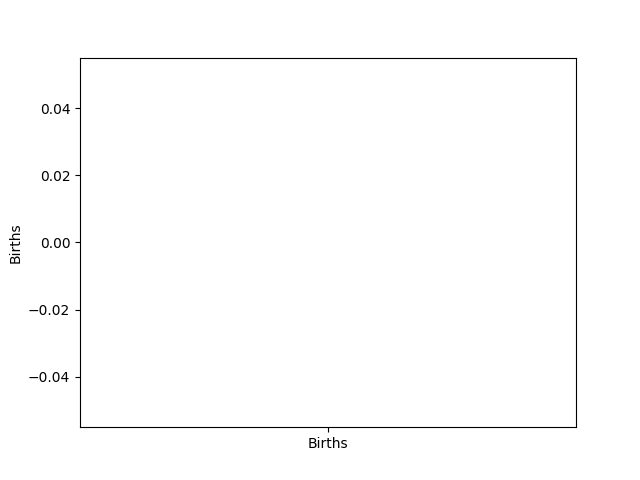

In [69]:
fig, ax = plt.subplots()

In [70]:
ax.bar("Births", dataframe["Births"].mean())
ax.set_ylabel("Births")
plt.show()